In [2]:
# For Jupyter Lab:
%load_ext lab_black

%matplotlib inline
from matplotlib import style

style.use("fivethirtyeight")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pprint import pprint

import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [35]:
inspector = inspect(engine)
table_names = inspector.get_columns("measurement")
print(table_names)

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


# Exploratory Climate Analysis

* Design a query to retrieve the last 12 months of precipitation data and plot the results

* Calculate the date 1 year ago from the last data point in the database

* Perform a query to retrieve the data and precipitation scores

* Save the query results as a Pandas DataFrame and set the index to the date column

* Sort the dataframe by date

* Use Pandas Plotting with Matplotlib to plot the data

In [13]:
# last date in db is 2017-08-23
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

prcp = (
    session.query(Measurement.prcp, Measurement.date)
    .filter(Measurement.date >= last_year)
    .all()
)

In [14]:
df = pd.DataFrame(prcp)
df = pd.DataFrame(prcp, index=df["date"])
df

,prcp,date
date,,
2016-08-23,0.00,2016-08-23
2016-08-24,0.08,2016-08-24
2016-08-25,0.08,2016-08-25
2016-08-26,0.00,2016-08-26
2016-08-27,0.00,2016-08-27
...,...,...
2017-08-19,0.09,2017-08-19
2017-08-20,NaN,2017-08-20
2017-08-21,0.56,2017-08-21


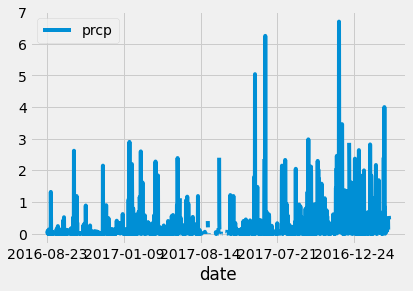

In [15]:
df.plot()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
stations = (
    session.query(func.count(Measurement.station)).group_by(Measurement.station).all()
)

print(stations)

[(1979,), (2709,), (2202,), (2612,), (1372,), (511,), (2772,), (2724,), (2669,)]


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)

pprint(active_stations)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# highest temperature recorded, and average temperature most active station?

stations_temp = (
    session.query(
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs),
    )
    .filter(Measurement.station == "USC00519281")
    .all()
)

print(stations_temp)

[(54.0, 85.0, 71.66378066378067)]


In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

high_temp = (
    session.query(Measurement.tobs, Measurement.date)
    .filter(Measurement.station == "USC00519281")
    .filter(Measurement.date >= last_year)
    .all()
)

# print(high_temp)

df1 = pd.DataFrame(high_temp)
df1

,tobs,date
0,77.0,2016-08-23
1,77.0,2016-08-24
2,80.0,2016-08-25
3,80.0,2016-08-26
4,75.0,2016-08-27
...,...,...
347,77.0,2017-08-14
348,77.0,2017-08-15
349,76.0,2017-08-16
350,76.0,2017-08-17


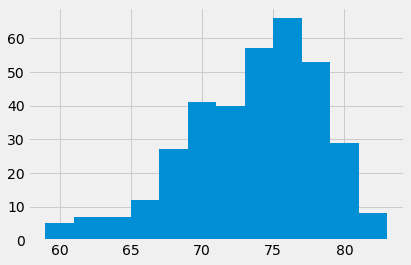

In [21]:
plt.hist(x=df1["tobs"], bins=12)
plt.show()

In [36]:
prcp = [
    ["2016-08-23", 0.45166666666666666],
    ["2016-08-24", 1.5549999999999997],
    ["2016-08-25", 0.07714285714285715],
    ["2016-08-26", 0.016666666666666666],
    ["2016-08-27", 0.06399999999999999],
]

In [66]:
x = {prcp[e][0]: prcp[e][1] for e in range(len(prcp))}
x

{'2016-08-23': 0.45166666666666666,
 '2016-08-24': 1.5549999999999997,
 '2016-08-25': 0.07714285714285715,
 '2016-08-26': 0.016666666666666666,
 '2016-08-27': 0.06399999999999999}

2016-08-23
2016-08-24
2016-08-25
2016-08-26
2016-08-27
